In [3]:
pip install country_converter --upgrade

Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install plotly==5.3.1

  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.1.0.post1
    Uninstalling kaleido-0.1.0.post1:
      Successfully uninstalled kaleido-0.1.0.post1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly
plotly.__version__

'5.3.1'

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import country_converter as coco



In [3]:
df = pd.read_csv('ds_salaries.csv', index_col=[0])

In [111]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Расшифровка данных: 
* work_year: год, в который выплачена зарплата. 
* experience_level: уровень на данной должности в течение года (EN - junior, MI - миддл, SE - сеньор, EX - руководитель).
* employment_type: тип занятости (PT -  неполный рабочий день, FT - полный рабочий день, CT - контракт, FL - фриланс).
* job_title: должность в течение года.
* salary: общая зарплата за год.
* salary_currency: вылюта выплачиваемой зарплаты.
* salaryinusd: зарплата в долларах. 
* employee_residence: страна проживания в виде кода ISO 3166.
* remote_ratio: объем работы, выполняемый дистанционно (0 - не было удаленной работы, 50 - частично удаленная работа, 100 - полная удаленная работа)
* company_location: страна главного офиса.
* company_size: среднее количество людей, работающих в компании (S - меньше 50, M - от 50 до 250, L - больше 250)

# Предобработка данных

In [9]:
df.shape

(607, 11)

In [10]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Итак, у нас имеются 11 колонок. 4 из них номинативные, 6 - категориальные. 

In [11]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Одномерный анализ

В этом блоке я произведу одномерный анализ всех переменных.

Начнем анализ с **номинативных переменных**, а именно - work_year, salary_in_usd, remote_ratio. Колонку "salary" я решила исключить из анализа, поскольку в ней зарплаты представлены в разных валютах и это очень неудобно.

### work_year

In [6]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Можно заметить, что больше всего данных представлено за 2022 год. Давайте визуализируем полученный результат.

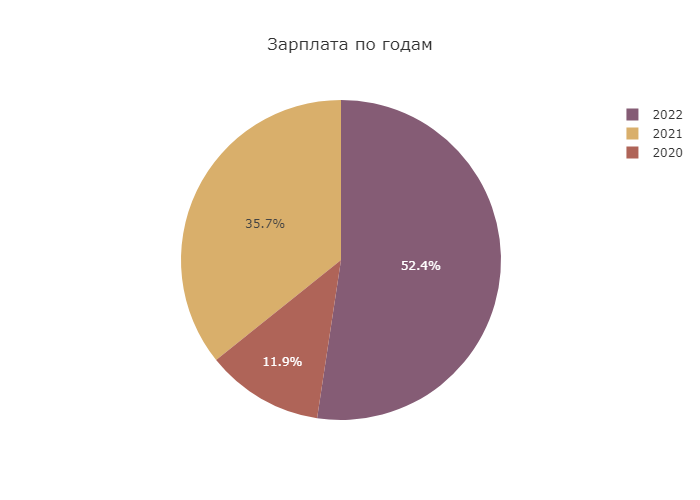

In [11]:
work_year_value = df['work_year'].value_counts()
fig = px.pie(work_year_value, values = work_year_value.values, names = work_year_value.index, title = "Зарплата по годам",
             color_discrete_sequence = [px.colors.qualitative.Antique[0], px.colors.qualitative.Antique[1],px.colors.qualitative.Antique[2]],
            template = 'ggplot2')
import plotly.io as pio
fig.show('png')

Таким образом, **52%** наблюдений в датафрейме приходятся на 2022 год.

### salary_in_usd

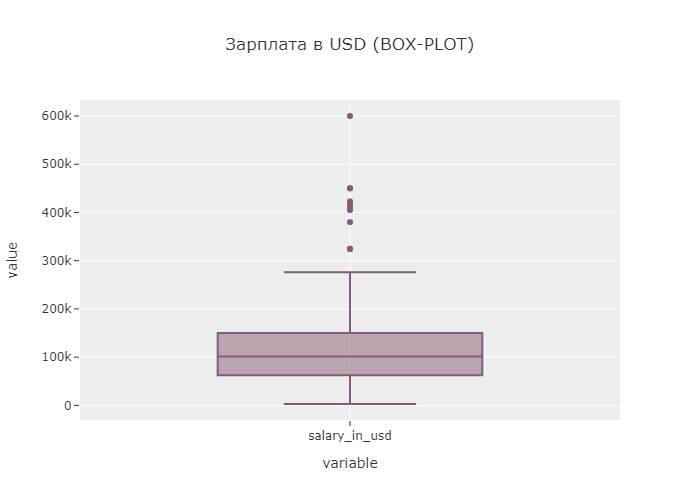

In [8]:
fig = px.box(df.salary_in_usd, title = 'Зарплата в USD (BOX-PLOT)',
             color_discrete_sequence = [px.colors.qualitative.Antique[0]],
             template = 'ggplot2')
            
fig.show('png')

Исходя из графика, можно сделать следующие выводы: 50% зарплат находятся диапазоне 63к и 150к. Минимальной зарплатой является 3к, максимальной - 600к, но это скорее выброс, если исключить такие аномальные зарплаты, то наиболее высокой является 276к. Средней медианной зарплатой является 101к.  

### remote_ratio 

In [42]:
df.remote_ratio.value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

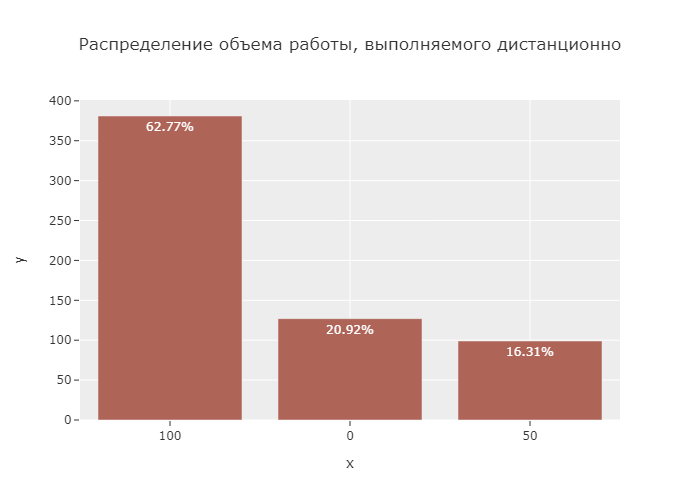

In [12]:
remote_ratio_value = df.remote_ratio.value_counts()
fig = px.bar(remote_ratio_value, x = remote_ratio_value.index.astype(str), y = remote_ratio_value.values, 
             title = 'Распределение объема работы, выполняемого дистанционно',
            color_discrete_sequence = [px.colors.qualitative.Antique[2]],
             template = 'ggplot2')
palette_color = sns.color_palette('colorblind')

fig.data[0].customdata = [62.77, 20.92, 16.31]
fig.data[0].texttemplate = '%{customdata}%'

fig.show('png')

Из графика видно, что **62.77%** работают полностью дистанционно.

Далее я буду анализировать **категориальные переменные**, а именно - experience_level, employment_type, job_title,  employee_residence, company_location, company_size.

### experience_level

In [51]:
df.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

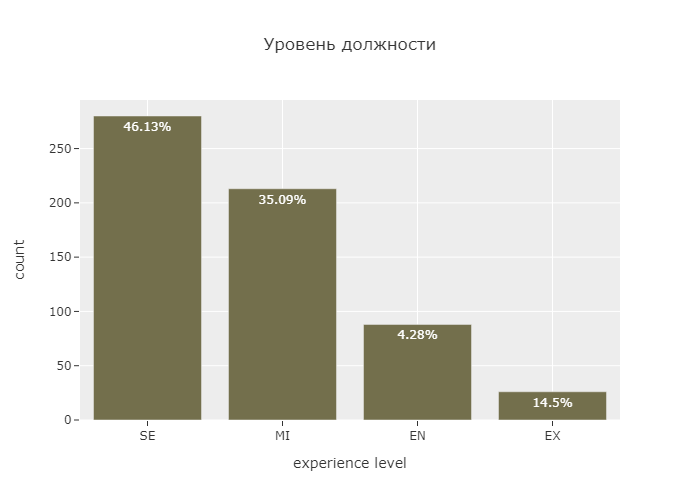

In [13]:
experience_level_value = df.experience_level.value_counts()
fig = px.bar(experience_level_value, x=experience_level_value.index, y=experience_level_value.values, 
             labels={'index':'experience level', 'y':'count'},
             title = 'Уровень должности',
             color_discrete_sequence = [px.colors.qualitative.Antique[3]],
             template = 'ggplot2')
        
fig.data[0].customdata = [46.13, 35.09 , 4.28 , 14.50]
fig.data[0].texttemplate = '%{customdata}%'

fig.show('png')

По графику видно, что большая часть работников является сеньорами - **46.13%**, меньше всего в компании руководителей - **14.5%**.

### employment_type 

In [78]:
df.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

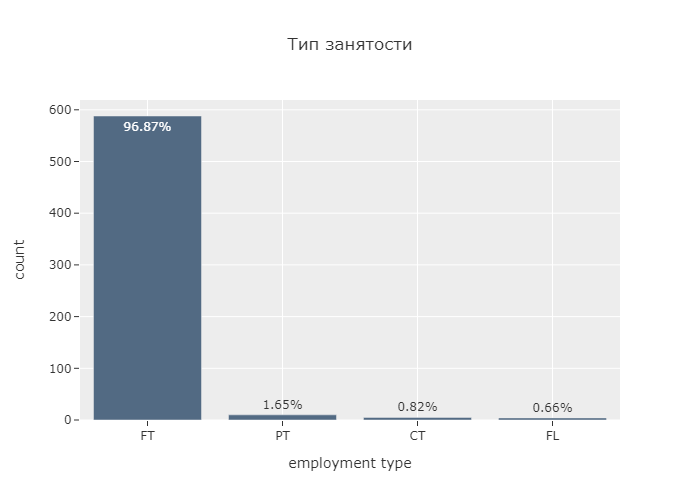

In [14]:
employment_type_value = df.employment_type.value_counts()
fig = px.bar(employment_type_value, x=employment_type_value.index, y=employment_type_value.values, 
             labels={'index':'employment type', 'y':'count'},
             title = 'Тип занятости',
             color_discrete_sequence = [px.colors.qualitative.Antique[4]],
             template = 'ggplot2')
        
fig.data[0].customdata = [96.87, 1.65 , 0.82 , 0.66]
fig.data[0].texttemplate = '%{customdata}%'

fig.show('png')

Из графика видно, что подавляющее большинство сотрудников работают полный рабочий день.

### job_title 

In [143]:
df.job_title.value_counts().head(10)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Principal Data Scientist        7
Name: job_title, dtype: int64

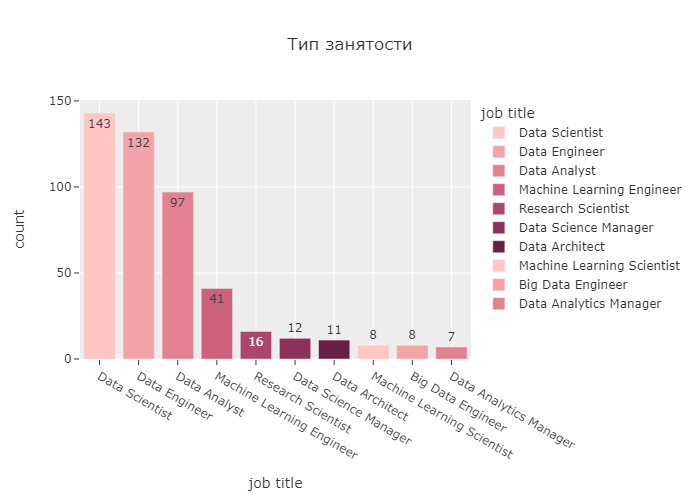

In [15]:
job_title_top10 = df.job_title.value_counts().head(10)
fig = px.bar(job_title_top10, x=job_title_top10.index, y=job_title_top10.values,
             color = job_title_top10.index,
             labels={'index':'job title', 'y':'count'},
             title = 'Тип занятости',
             text = job_title_top10.values,
             color_discrete_sequence = px.colors.sequential.Burg,
             template = 'ggplot2')
        

fig.show('png')

In [170]:
print(f"Процент Data Scientists в компании - {round(df.job_title.value_counts()['Data Scientist'] / df.job_title.value_counts().sum() * 100, 2)}%") 

Процент Data Scientists в компании - 23.56%


In [171]:
print(f"Процент Data Engineers в компании - {round(df.job_title.value_counts()['Data Engineer'] / df.job_title.value_counts().sum() * 100, 2)}%") 

Процент Data Engineers в компании - 21.75%


In [172]:
print(f"Процент Data Analysts в компании - {round(df.job_title.value_counts()['Data Analyst'] / df.job_title.value_counts().sum() * 100, 2)}%") 

Процент Data Analysts в компании - 15.98%


В компании больше всего следующих сотрудников - Data Scientist, Data Engineer, Data Analyst. В сумме они составляют 61.29%

### employee_residence

In [18]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [184]:
df.employee_residence.value_counts()

USA    332
GBR     44
IND     30
CAN     29
DEU     25
FRA     18
ESP     15
GRC     13
JPN      7
BRA      6
PAK      6
PRT      6
NLD      5
POL      4
RUS      4
ITA      4
VNM      3
AUS      3
ARE      3
TUR      3
AUT      3
NGA      2
ROU      2
BEL      2
DNK      2
MEX      2
SVN      2
SGP      2
HUN      2
JEY      1
LUX      1
CHL      1
MYS      1
BOL      1
HND      1
BGR      1
EST      1
PHL      1
MLT      1
TUN      1
IRQ      1
KEN      1
MDA      1
DZA      1
NZL      1
SRB      1
CHE      1
CHN      1
COL      1
IRN      1
IRL      1
HKG      1
HRV      1
PRI      1
ARG      1
UKR      1
CZE      1
Name: employee_residence, dtype: int64

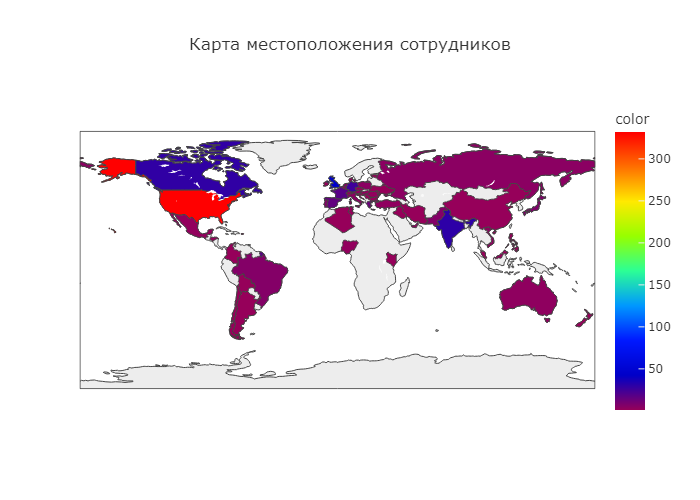

In [19]:
country = df.employee_residence.value_counts()
fig = px.choropleth(locations=country.index,
                    color=country.values,
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    template = 'ggplot2',
                    title = 'Карта местоположения сотрудников')


fig.show('png')

В основном сотрудники находятся в США, также достаточно много сотрудников расположены в следующих странах - Великобритания, Индия, Канада, Германия, Франция, Испания и Греция.

### company_location 

In [20]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country

In [186]:
df.company_location.value_counts()

USA    355
GBR     47
CAN     30
DEU     28
IND     24
FRA     15
ESP     14
GRC     11
JPN      6
POL      4
AUT      4
PRT      4
NLD      4
ARE      3
PAK      3
AUS      3
DNK      3
TUR      3
LUX      3
MEX      3
BRA      3
CHN      2
BEL      2
SVN      2
CZE      2
ITA      2
NGA      2
RUS      2
CHE      2
VNM      1
EST      1
MYS      1
IRN      1
CHL      1
HRV      1
UKR      1
SGP      1
MDA      1
IRQ      1
HND      1
MLT      1
HUN      1
ROU      1
ASM      1
KEN      1
IRL      1
DZA      1
NZL      1
ISR      1
COL      1
Name: company_location, dtype: int64

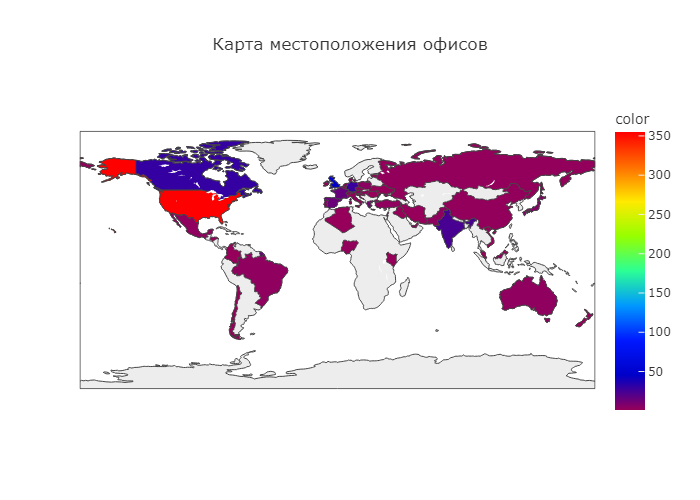

In [21]:
country_company = df.company_location.value_counts()
fig = px.choropleth(locations=country_company.index,
                    color=country_company.values,
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    template = 'ggplot2',
                    title = 'Карта местоположения офисов')


fig.show('png')

Офисы расположены в тех же странах, где находятся сотрудники. 

### company_size 

In [188]:
df.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

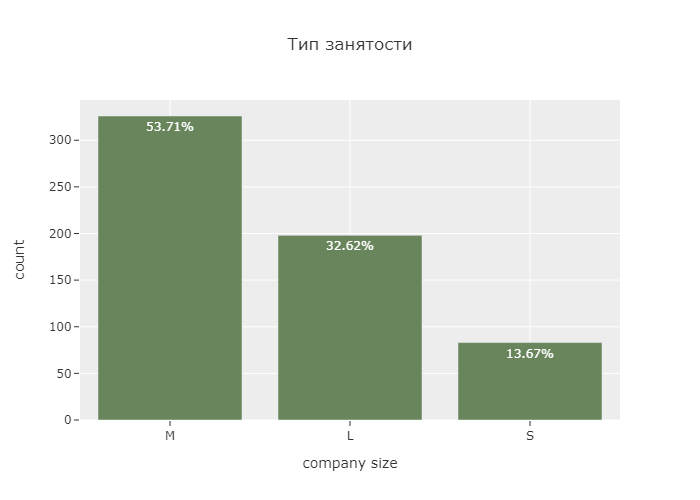

In [22]:
company_size_value = df.company_size.value_counts()
fig = px.bar(company_size_value, x=company_size_value.index, y=company_size_value.values, 
             labels={'index':'company size', 'y':'count'},
             title = 'Тип занятости',
             color_discrete_sequence = [px.colors.qualitative.Antique[6]],
             template = 'ggplot2')
        
fig.data[0].customdata = [53.71, 32.62, 13.67]
fig.data[0].texttemplate = '%{customdata}%'

fig.show('png')

**53.71%** компаний среднего размера, там от 50 до 250 сотрудников. Меньше всего малых компаний, всего **13.67%**.

Из графика видно, что полностью дистанционно работают 381 работников, на частичной дистанционке - 99, и полностью в офисе - 127 работников.

# Двумерный анализ

## Зависимость зарплат от должности,  объема работы и размера компании 

В первую очередь рассмотрим уровень получаемых зарплат - от чего зависит уровень зарплаты. 

В качестве основного показателя сравнения возьмем медианное среднее, так как сумма нам не подходит из-за неравномерного распределения сотрудников по отделам.

### salary_in_usd and job_title 

In [198]:
df.groupby('job_title', as_index = False).agg({'salary_in_usd':'median'}).sort_values(by='salary_in_usd', ascending = False)

,job_title,salary_in_usd
14,Data Analytics Lead,405000.0
28,Financial Data Analyst,275000.0
29,Head of Data,200000.0
45,Principal Data Engineer,200000.0
16,Data Architect,180000.0


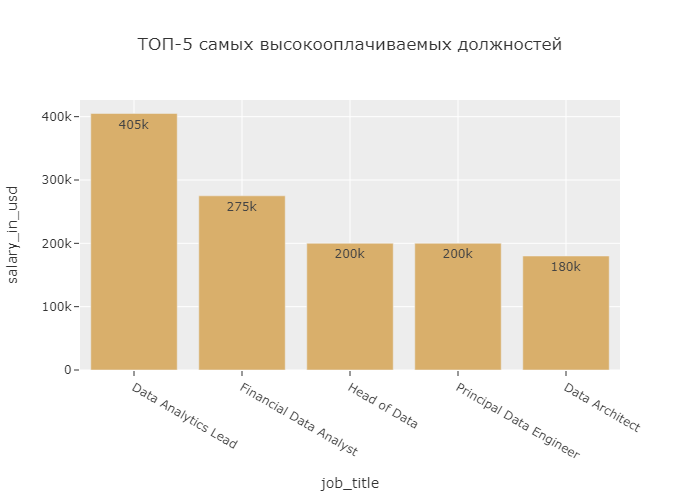

In [23]:
salary_of_job = df.groupby('job_title', as_index = False)\
                    .agg({'salary_in_usd':'median'})\
                    .sort_values(by='salary_in_usd', ascending = False)\
                    .head(5)
fig = px.bar(salary_of_job, x=salary_of_job.job_title, y=salary_of_job.salary_in_usd, 
             title = 'ТОП-5 самых высокооплачиваемых должностей',
             text = salary_of_job.salary_in_usd,
             color_discrete_sequence = [px.colors.qualitative.Antique[1]],
             template = 'ggplot2')

fig.data[0].customdata = ['405k', '275k' , '200k' , '200k', '180k']
fig.data[0].texttemplate = '%{customdata}'

fig.show('png')

Итак, наибольшие зарплаты получают специалисты следующих отделов: **Data Analytics Lead**, **Financial Data Analyst**, **Head of Data**, **Principal Data Engineer** и **Data Architect**. В целом, это логичный вывод, поскольку 3 из 5 должностей являются руководящими.

### salary_in_usd and remote_ratio

In [233]:
df.groupby('remote_ratio', as_index = False).agg({'salary_in_usd':'median'}).sort_values(by='salary_in_usd', ascending = False).head(5)

,remote_ratio,salary_in_usd
2,100,115000
0,0,99000
1,50,69999


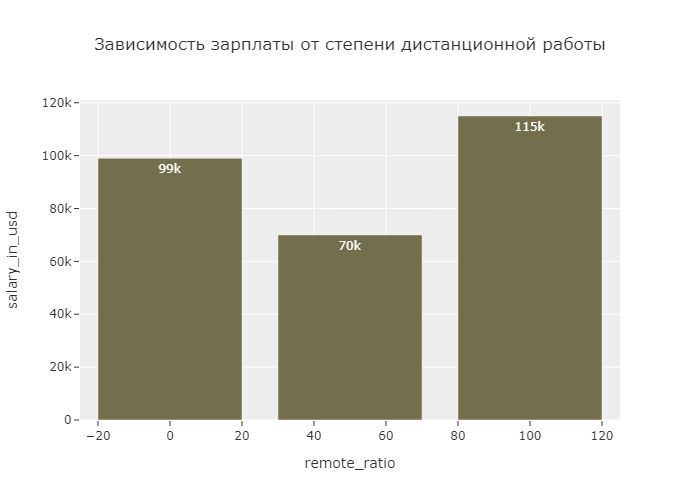

In [24]:

salary_of_residence = df.groupby('remote_ratio', as_index = False)\
                    .agg({'salary_in_usd':'median'})\
                    .sort_values(by='salary_in_usd', ascending = False)\
                    .head(5)
fig = px.bar(salary_of_residence, x=salary_of_residence.remote_ratio, y=salary_of_residence.salary_in_usd, 
             title = 'Зависимость зарплаты от степени дистанционной работы',
             text = salary_of_residence.salary_in_usd,
             color_discrete_sequence = [px.colors.qualitative.Antique[3]],
             template = 'ggplot2')

fig.data[0].customdata = ['115k', '99k' , '70k']
fig.data[0].texttemplate = '%{customdata}'

fig.show('png')

Большая зарплата отмечается у сотрудников, которые работают полностью дистанционно.

### salary_in_usd and company_size

In [238]:
df.groupby('company_size', as_index = False).agg({'salary_in_usd':'median'}).sort_values(by='salary_in_usd', ascending = False).head(5)

,company_size,salary_in_usd
1,M,113188
0,L,100000
2,S,65000


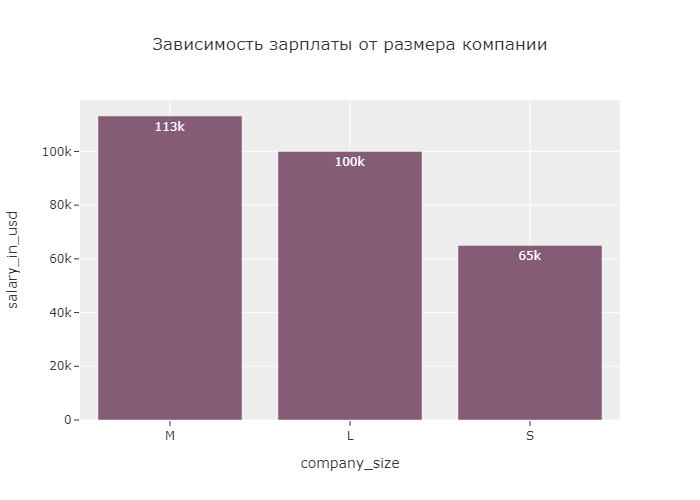

In [25]:

salary_of_company_size = df.groupby('company_size', as_index = False)\
                    .agg({'salary_in_usd':'median'})\
                    .sort_values(by='salary_in_usd', ascending = False)\
                    .head(5)
fig = px.bar(salary_of_company_size, x=salary_of_company_size.company_size, y=salary_of_company_size.salary_in_usd, 
             title = 'Зависимость зарплаты от размера компании',
             text = salary_of_residence.salary_in_usd,
             color_discrete_sequence = [px.colors.qualitative.Antique[0]],
             template = 'ggplot2')

fig.data[0].customdata = ['113k', '100k' , '65k']
fig.data[0].texttemplate = '%{customdata}'

fig.show('png')

Большая зарплата наблюдается у сотрудников компаний среднего размера.

## Зависимость типа занятости, должности, размера компании от опыта сотрудников

### employment_type and experience_level

In [27]:
employment_experience = df.groupby(['experience_level','employment_type']).size()

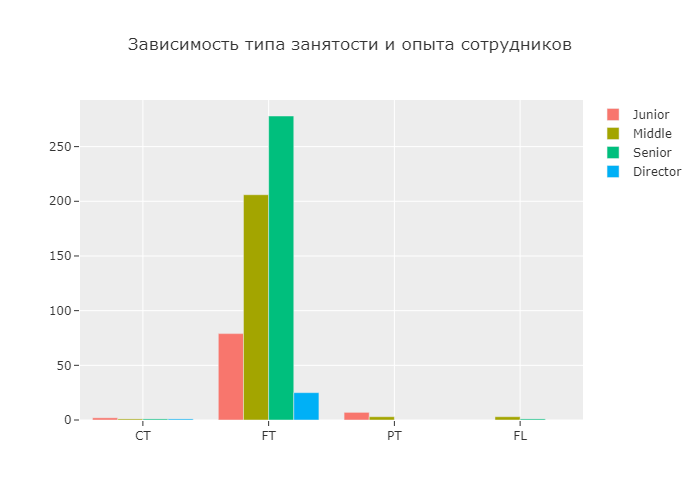

In [28]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name = 'Junior', x = employment_experience['EN'].index, y = employment_experience['EN'].values),
    go.Bar(name = 'Middle', x = employment_experience['MI'].index, y = employment_experience['MI'].values),
    go.Bar(name = 'Senior', x = employment_experience['SE'].index, y = employment_experience['SE'].values),
    go.Bar(name = 'Director', x = employment_experience['EX'].index, y = employment_experience['EX'].values)
])

fig.update_layout( title='Зависимость типа занятости и опыта сотрудников', template='ggplot2')

fig.show('png')

Как видно из графика, неполный рабочий день работают только junior и middle сотрудники. На фрилансе же только middle и senior сотрудники.

### experience_level and job_title

Рассмотрим ТОП-5 сотрудников по количеству, которые были выявлены в првом блоке анализа.

In [29]:
experience_job_title = df.query('job_title == "Data Scientist" or job_title == "Data Engineer" or job_title == "Data Analyst" or job_title == "Machine Learning Engineer" or job_title == "Research Scientist"')\
.groupby(['experience_level','job_title']).size()

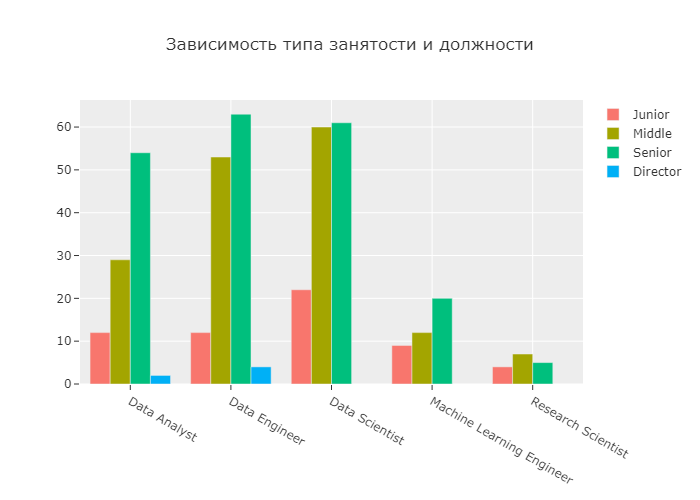

In [30]:
fig = go.Figure(data=[
    go.Bar(name = 'Junior', x = experience_job_title['EN'].index, y = experience_job_title['EN'].values),
    go.Bar(name = 'Middle', x = experience_job_title['MI'].index, y = experience_job_title['MI'].values),
    go.Bar(name = 'Senior', x = experience_job_title['SE'].index, y = experience_job_title['SE'].values),
    go.Bar(name = 'Director', x = experience_job_title['EX'].index, y = experience_job_title['EX'].values)
])

fig.update_layout( title='Зависимость типа занятости и должности', template='ggplot2')
fig.show('png')

На всех должностях, кроме Research Scientist, больше всего senior специалистов. 

###  experience_level and company_size

In [31]:
experience_company_size = df.groupby(['experience_level','company_size']).size()

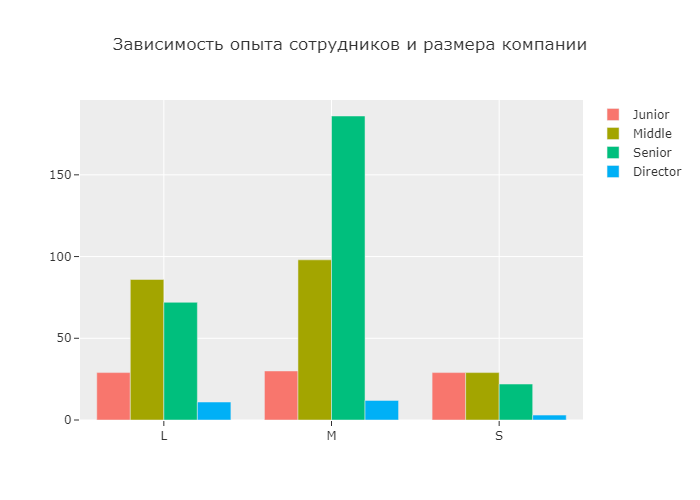

In [32]:
fig = go.Figure(data=[
    go.Bar(name = 'Junior', x = experience_company_size['EN'].index, y = experience_company_size['EN'].values),
    go.Bar(name = 'Middle', x = experience_company_size['MI'].index, y = experience_company_size['MI'].values),
    go.Bar(name = 'Senior', x = experience_company_size['SE'].index, y = experience_company_size['SE'].values),
    go.Bar(name = 'Director', x = experience_company_size['EX'].index, y = experience_company_size['EX'].values)
])

fig.update_layout( title='Зависимость опыта сотрудников и размера компании', template='ggplot2')
fig.show('png')

Больше всего senior специалистов наблюдается в компаниях среднего размера, также можно отметить, что их почти в два раза больше, чем middle специалистов. 